Load the `ISLR2` and `tidyverse` packages.

In [1]:
library('ISLR2')
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
Auto |> glimpse()

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


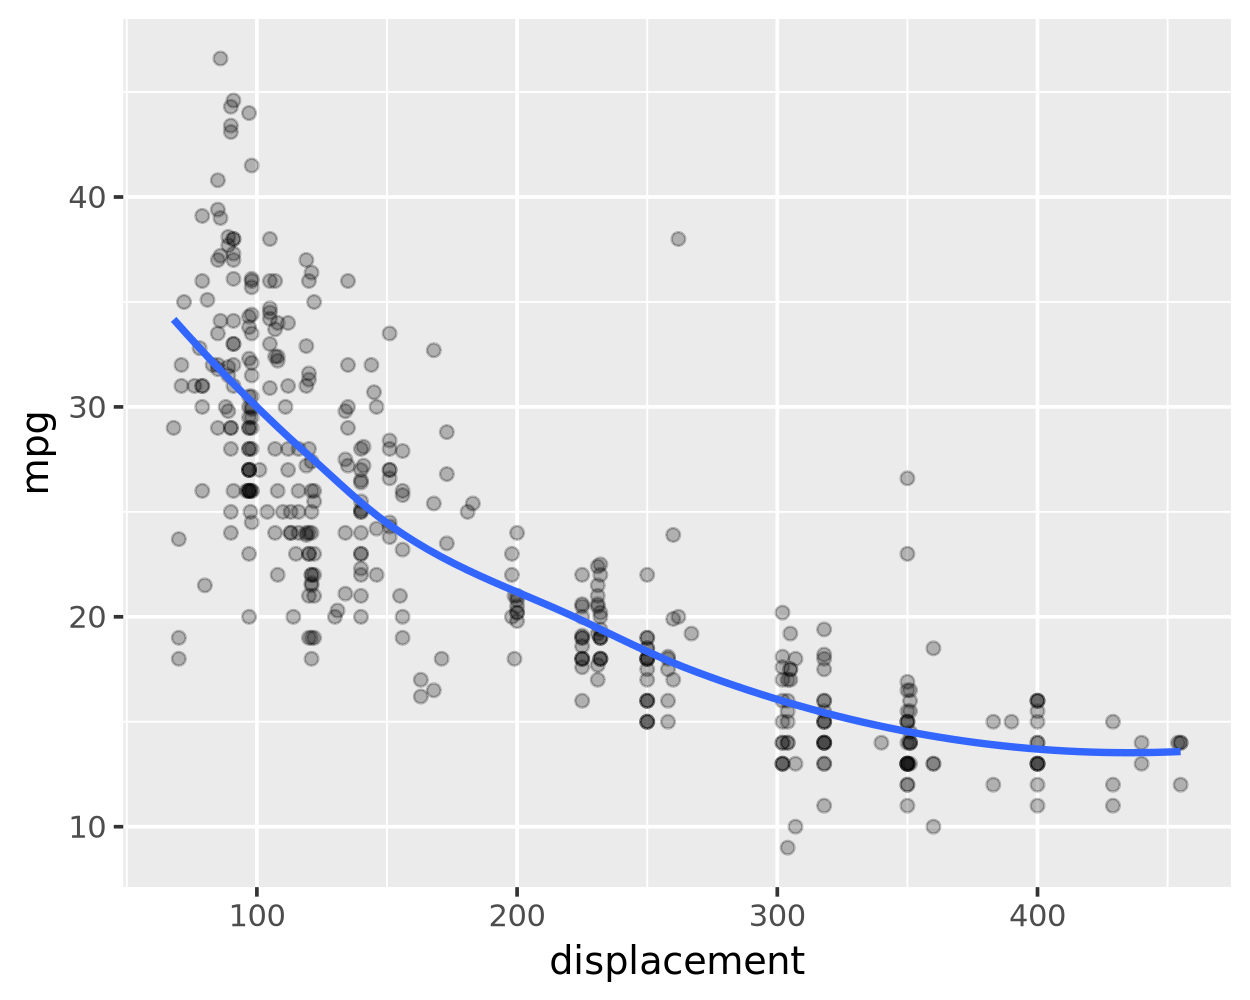

In [3]:
ggplot(Auto, aes(x = displacement, y = mpg )) +
    geom_point(alpha = 0.25) +
    geom_smooth(se = FALSE)

❓Does the relationship of `mpg` to `displacement` look linear?

The relationship is not quite linear.

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [10]:
# Create recipe for preprocessing data

rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement, deg_free = 5, options = list(raw = TRUE))  |>
    step_mutate(cyl_cat = factor(cylinders)) |> # establish cyclinder categories as new variable cyl_cat
    step_dummy(cyl_cat) |> # create dummy variables
    step_rm(cylinders) |> # drop original cylinders predictor    
    prep()

juice(rec) |> head()



mpg,displacement_ns_1,displacement_ns_2,displacement_ns_3,displacement_ns_4,displacement_ns_5,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0.000000e+00,0.282177134,0.56118203,0.1970569,-0.04041604,0,0,0,1
15,0.000000e+00,0.100763807,0.53367220,0.2690665,0.09649752,0,0,0,1
18,0.000000e+00,0.223819733,0.57591385,0.2171284,-0.01686203,0,0,0,1
16,3.299807e-07,0.299685945,0.55426107,0.1913627,-0.04531008,0,0,0,1
17,8.909480e-06,0.311732027,0.54894655,0.1875145,-0.04820201,0,0,0,1
15,0.000000e+00,0.001529878,0.05672152,0.3690335,0.57271515,0,0,0,1


In [11]:
 # Create and fit model

mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),21.32287,2.092774,10.188810,1.000832e-21
displacement_ns_1,-13.09467,1.511297,-8.664522,1.300119e-16
displacement_ns_2,-12.16456,2.741344,-4.437445,1.192527e-05
displacement_ns_3,-20.59750,3.151099,-6.536610,2.017473e-10
displacement_ns_4,-25.76019,3.801022,-6.777176,4.658036e-11
displacement_ns_5,-18.70139,2.502981,-7.471645,5.445520e-13
cyl_cat_X4,14.52532,2.379553,6.104220,2.539785e-09
cyl_cat_X5,16.36407,3.404368,4.806785,2.208922e-06
cyl_cat_X6,12.68749,2.726401,4.653566,4.505760e-06


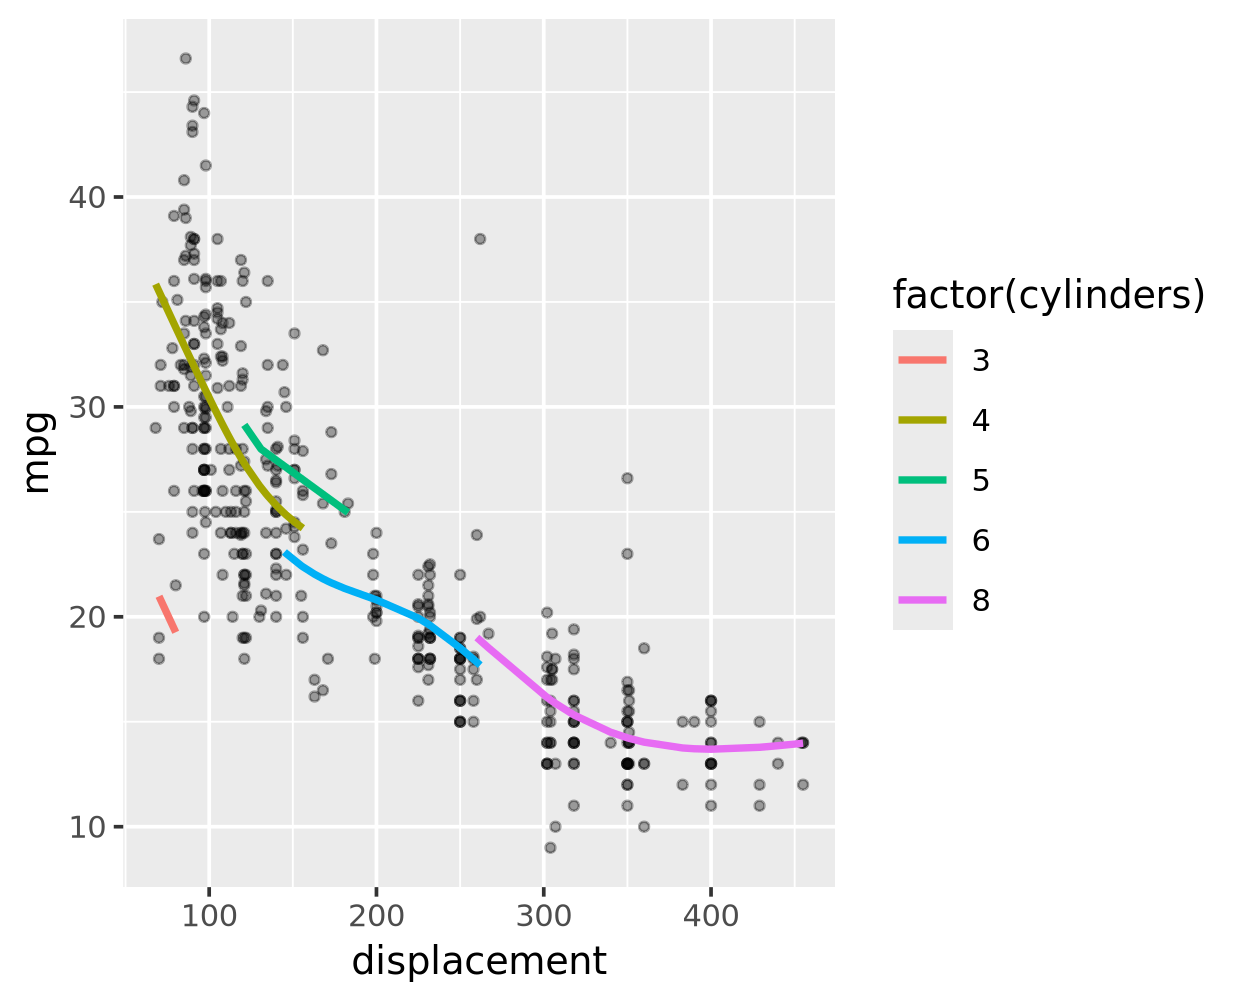

In [12]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

I think degrees of freedom 6ould not decide